<a href="https://colab.research.google.com/github/irythmgarg/heart_disease_predictor_project/blob/main/Heart_disease_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CHECK WHETHER A PATIENT HAVE HEART DISEASE OR NOT USING LOGISTIC REGRESSION***

In [150]:
import pandas as pd # import pandas library
import numpy as np

df = pd.read_csv('/content/Book 4 (1).csv') #loading dataset
df



,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0
5,77,Male,309,110,73,Never,NaN,0,No,Yes,Yes,4,122,Yes,Asymptomatic,1
6,64,Female,211,105,86,Former,Heavy,8,Yes,Yes,Yes,2,120,No,Typical Angina,1
7,60,Female,208,148,83,Never,Moderate,4,No,Yes,Yes,2,113,Yes,Asymptomatic,1
8,37,Female,317,137,66,Current,Heavy,3,No,Yes,Yes,5,114,No,Non-anginal Pain,0
9,63,Male,204,141,68,Former,Heavy,8,No,Yes,No,3,107,No,Asymptomatic,1


In [130]:
df.head() #head of the dataset

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [131]:
# preprocessing steps

# deleting unwanted columns from the data set

df1=df.drop(['Obesity','Gender','Chest Pain Type','Smoking','Blood Sugar','Blood Sugar','Exercise Induced Angina'],axis=1);
df1

,Age,Cholesterol,Blood Pressure,Heart Rate,Alcohol Intake,Exercise Hours,Family History,Diabetes,Stress Level,Heart Disease
0,75,228,119,66,Heavy,1,No,No,8,1
1,48,204,165,62,NaN,5,No,No,9,0
2,53,234,91,67,Heavy,3,Yes,No,5,1
3,69,192,90,72,NaN,4,No,Yes,7,0
4,62,172,163,93,NaN,6,No,Yes,2,0
5,77,309,110,73,NaN,0,No,Yes,4,1
6,64,211,105,86,Heavy,8,Yes,Yes,2,1
7,60,208,148,83,Moderate,4,No,Yes,2,1
8,37,317,137,66,Heavy,3,No,Yes,5,0
9,63,204,141,68,Heavy,8,No,Yes,3,1


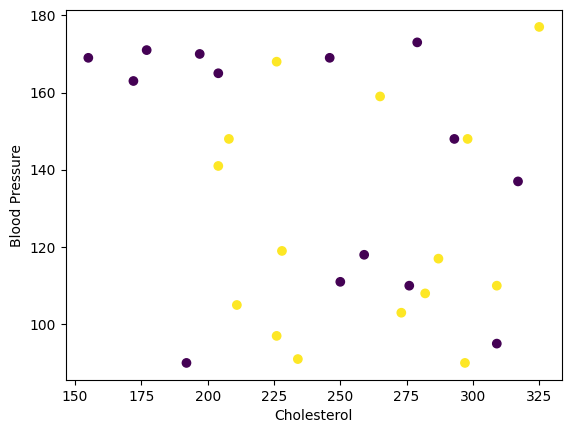

In [132]:
import matplotlib.pyplot as plt #import library to plot data
plt.scatter(df1['Cholesterol'],df1['Blood Pressure'],c=df1['Heart Disease']) # scatter can plot only 2d data set thats why two independents are passed
plt.xlabel('Cholesterol')
plt.ylabel('Blood Pressure')
plt.show()

In [133]:
# preprocessing to convert categorical data into numerical data

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder();
df1['Alcohol Intake']=lb.fit_transform(df1['Alcohol Intake']);
df1['Diabetes']=lb.fit_transform(df1['Diabetes']);
df1['Family History']=lb.fit_transform(df1['Family History']);
df1

,Age,Cholesterol,Blood Pressure,Heart Rate,Alcohol Intake,Exercise Hours,Family History,Diabetes,Stress Level,Heart Disease
0,75,228,119,66,0,1,0,0,8,1
1,48,204,165,62,2,5,0,0,9,0
2,53,234,91,67,0,3,1,0,5,1
3,69,192,90,72,2,4,0,1,7,0
4,62,172,163,93,2,6,0,1,2,0
5,77,309,110,73,2,0,0,1,4,1
6,64,211,105,86,0,8,1,1,2,1
7,60,208,148,83,1,4,0,1,2,1
8,37,317,137,66,0,3,0,1,5,0
9,63,204,141,68,0,8,0,1,3,1


In [134]:
x=df1.iloc[:,0:9];  # independent columns of the dataset
x
y=df1.iloc[:,9]; # dependent columns of the data set
y

0     1
1     0
2     1
3     0
4     0
5     1
6     1
7     1
8     0
9     1
10    1
11    0
12    1
13    0
14    1
15    0
16    0
17    0
18    0
19    1
20    1
21    0
22    1
23    1
24    0
25    0
26    1
27    1
28    0
Name: Heart Disease, dtype: int64

In [135]:
from sklearn.model_selection import train_test_split # library to divide data into training data and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)  # 10 percent is the testing data

In [146]:
# some times our data is having very large values so scaling is used to convert all values in between -1 and 1
from sklearn.preprocessing import StandardScaler
sc=StandardScaler();
x_train=sc.fit_transform(x_train);
x_test=sc.transform(x_test);
x_train

array([[ 1.32987522,  1.11100442,  0.37926104, -0.5952095 , -1.0443762 ,
         1.46829902,  0.79056942,  0.9258201 ,  0.55179147],
       [ 1.55835598, -1.07111795,  1.11464176, -1.29863892,  0.13622298,
         1.0344834 , -1.26491106, -1.08012345,  0.90170801],
       [-0.26949013, -0.27172659, -1.52604356, -0.82968598, -1.0443762 ,
        -1.1345947 ,  0.79056942, -1.08012345, -0.49795816],
       [ 0.11131114,  1.08939925, -1.55946995, -0.43889186,  1.31682217,
         0.16685216,  0.79056942, -1.08012345,  1.25162456],
       [ 0.41595216, -1.61124725,  0.88065698,  1.20244344,  1.31682217,
         0.16685216, -1.26491106,  0.9258201 , -1.54770778],
       [-0.65029141, -0.91988174,  0.94750977, -1.22048009,  1.31682217,
        -0.26696346, -1.26491106, -1.08012345,  0.90170801],
       [-1.48805421,  1.00297856,  0.37926104,  1.59323756,  0.13622298,
         0.16685216,  0.79056942, -1.08012345,  1.25162456],
       [-0.80261192,  0.26840271, -0.62353086, -0.12625656, -1

In [137]:
# apply logistic regression algorithm on this data set to design a boundary
from sklearn.linear_model import LogisticRegression
cl=LogisticRegression() # object of the LogisticRegression
cl.fit(x_train,y_train); # fit the corresponding data to algorithm
prediction=cl.predict(x_test) # ans of prediction whether patient have heart disease or not
from sklearn.metrics import accuracy_score # library to callulate accuracy
accuracy_score(y_test,prediction) # accuracy of the model

0.6666666666666666

In [172]:
print("enter the details of the person");
age=int(input("enter the age"));
Cholestrol=int(input("enter the Cholestrol"));
bloodpressure =int(input("enter the blood pressure "));
heartrate =int(input("enter the resting heart rate "));
alcoholintake=int(input("enter the alcohol intake(0/1/2) "));
diabetes=int(input("enter the diabetes(0/1) "));
familyhistory=int(input("enter the familyhistory(0/1"));
exercisehours=int(input("enter the exercise hours "));
stresslevel=int(input("enter the stress level "));
arr=np.array([age,Cholestrol,bloodpressure,heartrate,alcoholintake,exercisehours,familyhistory,diabetes,stresslevel]);
ans=cl.predict(arr.reshape(1,-1))[0];
if ans==1:
  print("person have heart disease");
else:
  print("person does not have heart disease");


enter the details of the person
enter the age1
enter the Cholestrol1
enter the blood pressure 1
enter the resting heart rate 1
enter the alcohol intake(0/1/2) 1
enter the diabetes(0/1) 1
enter the familyhistory(0/11
enter the exercise hours 1
enter the stress level 1
person have heart disease


array([0])